In [34]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [37]:
train_data = '/content/drive/MyDrive/Datasets AI/train'
test_data =  '/content/drive/MyDrive/Datasets AI/test'
val_data  =  '/content/drive/MyDrive/Datasets AI/val'

In [49]:
from keras.engine.data_adapter import train_validation_split
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(128, 128),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(128, 128),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(128, 128),
                        batch_size=32,
                        class_mode="categorical")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [50]:
#ĐẶT NHÃN
class_name = ['Normal', 'Pneumoia']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print(" Health problems: ",train_input.num_classes)

labels:  ['Normal', 'Pneumoia']
match class:  {'NORMAL': 0, 'PNEUMONIA': 1}
 Health problems:  2


In [51]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2,activation='softmax'))  
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 32, 32, 64)       

In [52]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
pneumonia_train = model.fit(train_input,batch_size=30,epochs=10,verbose=1,validation_data=val_input)

Epoch 1/10
163/163 [==============================] - 78s 463ms/step - loss: 1.3832 - accuracy: 0.7483 - val_loss: 0.5500 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 77s 475ms/step - loss: 0.3297 - accuracy: 0.8664 - val_loss: 0.6112 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 75s 462ms/step - loss: 0.2737 - accuracy: 0.8888 - val_loss: 0.8598 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 74s 455ms/step - loss: 0.2422 - accuracy: 0.8984 - val_loss: 0.5263 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 75s 461ms/step - loss: 0.2481 - accuracy: 0.8963 - val_loss: 0.6106 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 74s 456ms/step - loss: 0.2178 - accuracy: 0.9074 - val_loss: 0.5913 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 74s 454ms/step - loss: 0.1989 - accuracy: 0.9201 - val_loss: 0.7398 - val_ac

In [54]:
model.save('/content/drive/MyDrive/Datasets AI/Pneumonia.h5')

array([0])

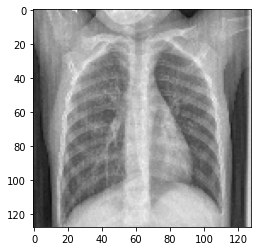

In [57]:
pic = image.load_img('/content/drive/MyDrive/Datasets AI/test/NORMAL/IM-0009-0001.jpeg', target_size=(128,128)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [58]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("status: Normal")
if guess[0]==1:
  print("status: Pneumonia")


status: Normal
